# Introduction to PyParticleBunch 

## In this notebook you should learn:
- How to use PyParticleBunch to generate particle bunch distributions of various types
- How to plot heatmaps of the distributions by selecting 2 co-ordinates, and how to save the plot to file
- How to save `ParticleBunch` co-ordinates to MAD-X, PTC, and data files
- How to generate a `ParticleBunch` from a stored data file

> # PyParticleBunch
>
> PyParticleBunch is a **python library** written by the ISIS Synchrotron Group.
> It is designed to:
>   - **Generate particle distribution co-ordinates** for use in various beam dynamics codes such as cPyMAD, PTC, and PyORBIT. This allows accelerator physicists to define a simulated particle *bunch*.
>   - **Match particle distribution to accelerator optics**: particle co-ordinates must be rotated in phase space in order to match the conditions in a specific position in an accelerator model. In this way the bunch imitates the physical bunch at the same position in the accelerator. Matching is performed using the TWISS or Courant-Snyder parameters of the accelerator $(\alpha_x, \alpha_y, \beta_x, \beta_y, D_x, D_y)$. These parameters may be calculated using cPyMAD, or PTC.
>   - **Save particle co-ordinates to files**. This allows us to load the *bunch* in different simulation codes.
>   - **Plot particle bunch co-ordinates**. This allows us to inspect the simulated *bunches* visually in order to understand the beam dynamics.
>   - **Be expanded as needs arise**. 

> A `ParticleBunch` generated using `PyParticleBunch` is a python object that contains an array of `Particle` objects. 
>
> Each `Particle` object defines a particle using 6-dimensional co-ordinates: three spatial co-ordinates $(x, y, t)$, and three momentum components $(x\prime, y\prime, p_t)$, where $x\prime$ and $y\prime$ are the transverse trace space angles, and $p_t$ the longitudinal canonical momentum.

$$ ParticleBunch =  \begin{pmatrix} Particle_0\\Particle_1\\...\\ Particle_n \end{pmatrix} $$

$$ Particle = \begin{pmatrix}
x\\ y\\ t\\ x\prime\\ y\prime\\ p_t\\
\end{pmatrix}$$


#### Import PyParticleBunch and numpy 

In [1]:
import numpy as np
from PyParticleBunch import *

# Generating a `ParticleBunch`

> `ParticleBunch` has an **overloaded constructor** using **decorators**. The constructor is the function that creates the `ParticleBunch` object. 
> 
> This means that there are multiple methods of **instantiating** the `ParticleBunch` object.
>
> In programming, **instantiation** is the creation of a real instance or particular realization of an abstraction or template such as a class of objects or a computer process - in this case our python object `ParticleBunch`.
>
> A **decorator** in Python is a function that takes another function as its argument, and returns yet another function. Decorators can be extremely useful as they allow the extension of an existing function, without any modification to the original function source code.
>
> In Python, the `@classmethod` decorator is used to declare a method in the class as a class method that can be called using `ClassName.MethodName()`.
>
> The following constructors are currently available (note emittance is RMS - i.e. 1 sigma):
> - **`ParticleBunch.empty(n)`**: creates a bunch of `n` particles with all particle 6D co-ordinates set to 0.
>
>
> - **`ParticleBunch.from_file(filename, n=None)`**: creates a bunch of `n` particles from an input file (6 columns: x, xp, y, yp, t, pt), where the default `n` is the lines in the file, but fewer can be selected by choosing an integer `n` less than the lines in the file.
>
>
> - **`ParticleBunch.Uniform_1D(n, min_lim, max_lim, horizontal=True)`**: creates a 1D uniform distribution in either `x` or `y` using the `horizontal` flag, between limits `min_lin` and `max_lim` (in meters).
>
>
> - **`ParticleBunch.Uniform_2D(cls, n, min_x, max_x, min_y, max_y)`**: creates a 2D transverse uniform distribution in the `xy` plane with minima and maxima specified in each plane (in meters).
>
>
> - **`ParticleBunch.Poincare_1D(cls, n, coordinate, emittance, alpha, beta, min_sig, max_sig, closed_orbit=0., deltap=None, dispersion=None)`**: creates a 1D Poincare distribution (used to generate Poincare sections) in the `coordinate`=`x` or `y` tranvserse planes. The beam `emittance` and Courant-Snyder parameters $\alpha, \beta$ in the same plane must be provided for matching. Minima and maxima in beam sigma define the limits of the distribution. The `closed_orbit` parameter allows the addition of the closed orbit to the particle co-ordinates (in meters). The accelerator `dispersion` may also be included (in meters), in which case a momentum spread value `deltap` must be provided. `deltap` is specified as a float - for example $\frac{\delta P}{P} $= 3% would be input as 0.03.
>
>
> - **`ParticleBunch.Poincare_2D(cls, n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, min_sig, max_sig, closed_orbit_x=0., closed_orbit_y=0., deltap=None, d_x=None, d_y=None)`**: creates a 2D Poincare distribution (used to generate Poincare sections) in the `xy` tranvserse plane. The beam `emittance` and Courant-Snyder parameters $\alpha, \beta$ in both planes must be provided for matching. Minima and maxima in beam sigma define the limits of the distribution. The `closed_orbit` parameters allows the addition of the closed orbit to the particle co-ordinates (in meters). The accelerator dispersions `d_x, d_y` may also be included (in meters), in which case a momentum spread value `deltap` must be provided. `deltap` is specified as a float - for example $\frac{\delta P}{P} $= 3% would be input as 0.03.
>
>
> - **`ParticleBunch.Gaussian_1D(n, std_dev, mean, coordinate)`**: creates 1D Gaussian distribution of `n` particles, in a `coordinate`=`x, y, t, xp, yp, pt`, with a standard deviation `std_dev` and mean `mean`. Distribution is limited to +/- 5 standard deviations (sigma).
>
>
> - **`ParticleBunch.Gaussian_2D(n, mean1, std_dev1, mean2, std_dev2, coordinate1, coordinate2)`**: creates a 2D Gaussian distribution of `n` particles, in 2 `coordinate`=`x, y, t, xp, yp, pt`, each with a standard deviation `std_dev` and mean `mean`. Distribution is limited to +/- 5 standard deviations (sigma).
>
>
> - **`ParticleBunch.Gaussian_4D(cls, n, mean_x, std_dev_x, mean_xp, std_dev_xp, mean_y, std_dev_y, mean_yp, std_dev_yp)`**: creates a 4D Gaussian distribution of `n` particles, in transverse coordinates `x, y, xp, yp`, each with a standard deviation `std_dev` and mean `mean`. Distribution is limited to +/- 5 standard deviations (sigma).
>
>
> - **`ParticleBunch.MatchedGaussian_4D(cls, n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, x_limit = 5, y_limit = 5)`**: creates a matched 4D Gaussian distribution of `n` particles, in transverse coordinates `x, y, xp, yp`, generated using the transverse emittances, and accelerator Courant-Snyder (or TWISS) parameters $(\alpha_x, \alpha_y, \beta_x, \beta_y)$. The parameters `x_limit` and `y_limit` represent the transverse coordinate cut-offs in units of standard deviation. The default is a 5 sigma (std dev) cut. 
>
>
> - **`ParticleBunch.MatchedKV_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y)`**: creates a matched 4D KV distribution of `n` particles, in transverse coordinates `x, y, xp, yp`, generated using the transverse emittances, and accelerator Courant-Snyder (or TWISS) parameters $(\alpha_x, \alpha_y, \beta_x, \beta_y)$.
>
>
> - **`ParticleBunch.MatchedWaterbag_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y)`**: creates a matched 4D waterbag distribution of `n` particles, in transverse coordinates `x, y, xp, yp`, generated using the transverse emittances, and accelerator Courant-Snyder (or TWISS) parameters $(\alpha_x, \alpha_y, \beta_x, \beta_y)$.


# Plotting a `ParticleBunch`

> `ParticleBunch` has a single function (so far) to plot the generated distributions:
>
> - **`ParticleBunch.plot_heatmap(coordinate1, coordinate2, savefile, title=None, bins=128)`**: generates a 2D heatmap plot with histograms using MatPlotLib. Co-ordinates may be specified using the values in the table below, the plot is saved to file by providing a `savefile` filename (e.g. plot.png). A `title` string may be provided, and the number of bins may be modified using `bins` where the default is a 128 x 128 grid.
>
>
> ### Co-ordinate selection
> The following variables are equivalent when selecting co-ordinate


| Preferred | Capital  | Number       | Alternate 1 | Alternate 2 |
|-----------|----------|--------------|-------------|-------------|
| (string)  | (string) | (string/int) | (string)    | (string)    |
| x         | X        | 1            |             |             |
| xp        | XP       | 2            | x'          | X'          |
| y         | Y        | 3            |             |             |
| yp        | YP       | 4            | y'          | Y'          |
| t         | T        | 5            | z           | Z           |
| pt        | PT       | 6            | E           | dE          |

# Generating and Plotting `ParticleBunch`: Examples

#### Access bash: Delete existing Plots directory and make a directory called 'Plots'

In [2]:
! rm -r Plots

In [3]:
! mkdir Plots

## Bunch from file
- the input file `Inputs/inj.madx_bunch` has been provided

#### Access bash and list files in Inputs directory

In [4]:
! ls Inputs

inj.madx_bunch


In [5]:
bunch_from_file = ParticleBunch.from_file('Inputs/inj.madx_bunch')

Loaded 0 particles
Loaded 10000 particles
Loaded 20000 particles
Loaded 30000 particles
Loaded 40000 particles
Loaded 50000 particles
Loaded 60000 particles
Loaded 70000 particles
Loaded 80000 particles
Loaded 90000 particles


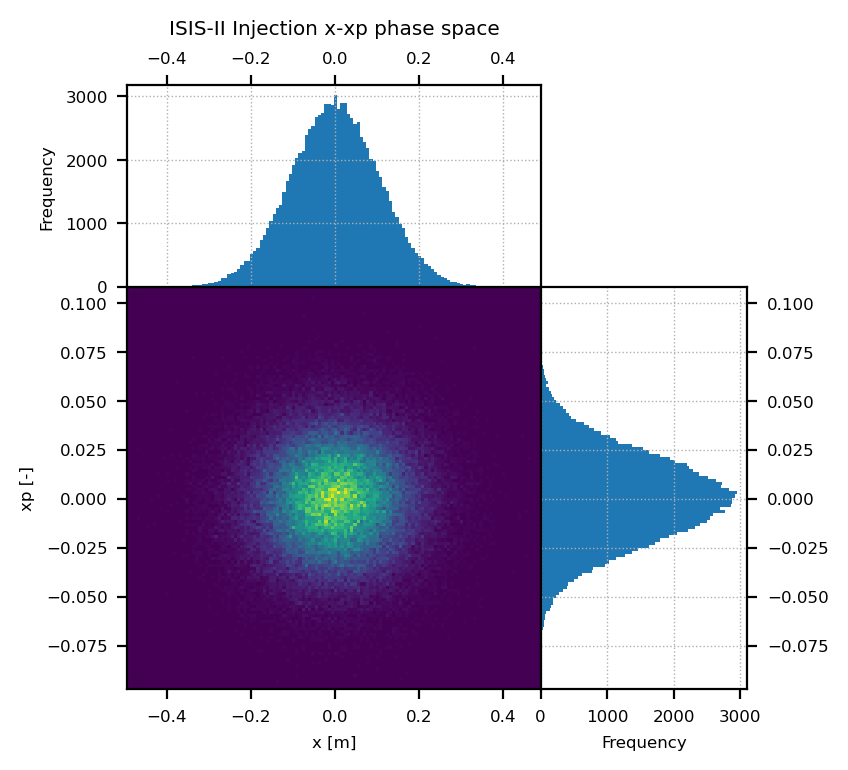

In [6]:
bunch_from_file.plot_heatmap('x', 'xp', 'Plots/bunch_from_file.png', 'ISIS-II Injection x-xp phase space')

## 1D Uniform

In [7]:
n = 1E5
min_lim = -2E-3
max_lim = 1E-3
horizontal=True
H_UniformBunch = ParticleBunch.Uniform_1D(n, min_lim, max_lim, horizontal)

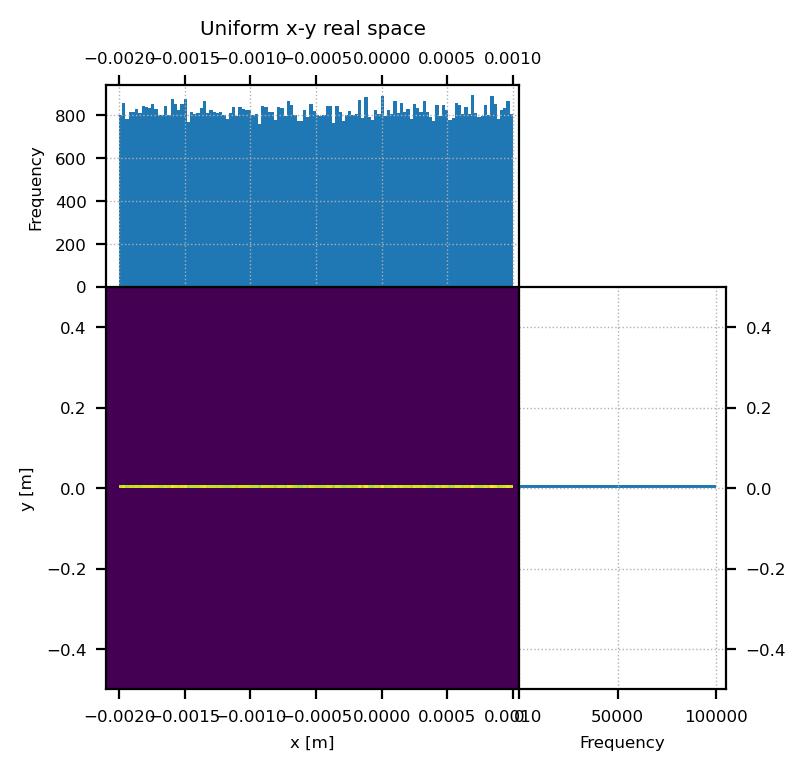

In [8]:
H_UniformBunch.plot_heatmap('x', 'y', 'Plots/1D_uniform.png','Uniform x-y real space')

## 2D Uniform

In [9]:
n = 1E5
min_x = -2E-3
max_x = 1E-3
min_y = 3E-3
max_y = 6E-3
HV_UniformBunch = ParticleBunch.Uniform_2D(n, min_x, max_x, min_y, max_y)

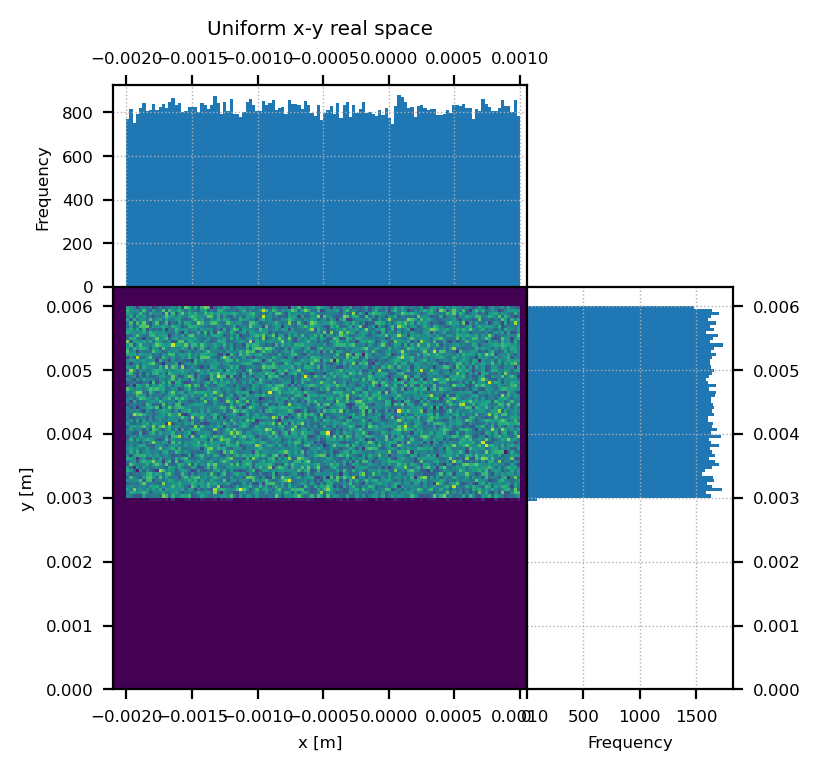

In [10]:
HV_UniformBunch.plot_heatmap('x', 'y', 'Plots/2D_uniform.png','Uniform x-y real space')

## 1D Poincare

In [11]:
beta_x = 3.183218456327231
beta_y = 17.366440445018583
alpha_x =  -0.002213666757314968
alpha_y =  -0.0010751726719423877
D_x =  0.0003478381975430389
D_xp = -0.0010490010818251987
D_y = 0.
D_yp = 0.
emittance_x = 750 * 1E-6
min_sig = 0
max_sig = 10
n = 10
Poincare_1D_bunch = ParticleBunch.Poincare_1D(n, 'x', emittance_x, alpha_x, beta_x, min_sig, max_sig, closed_orbit=0., deltap=None, dispersion=None)

x
MatchedBunchGenerator1D::Poincare_1D: Dispersion Not Set - Assuming to be ZERO


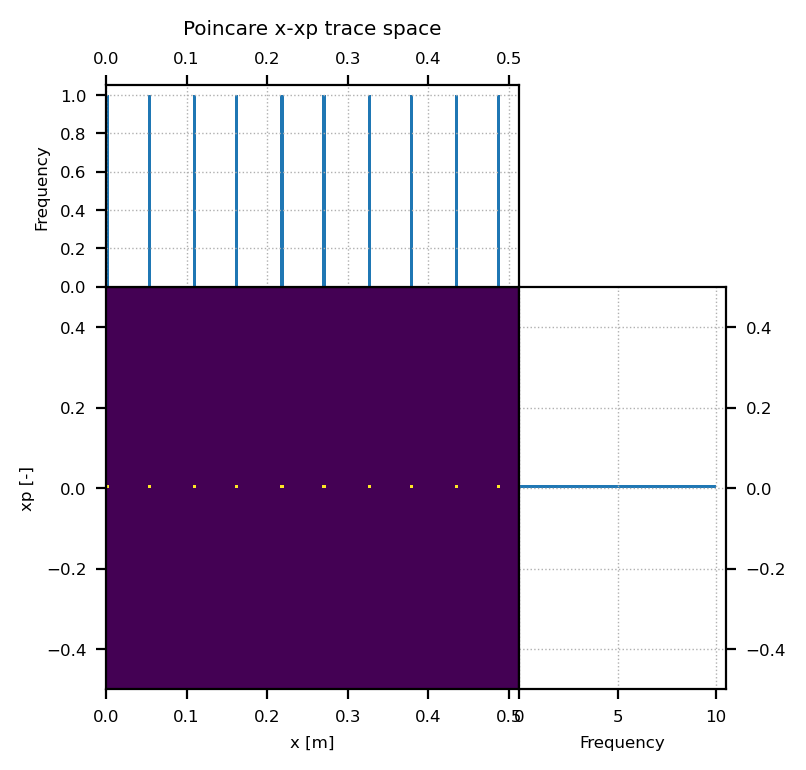

In [12]:
Poincare_1D_bunch.plot_heatmap('x', 'xp', 'Plots/1D_Poincare_horizontal.png','Poincare x-xp trace space')

## 1D Poincare - 0.5 m closed orbit offset

In [13]:
beta_x = 3.183218456327231
beta_y = 17.366440445018583
alpha_x =  -0.002213666757314968
alpha_y =  -0.0010751726719423877
D_x =  0.0003478381975430389
D_xp = -0.0010490010818251987
D_y = 0.
D_yp = 0.
emittance_x = 750 * 1E-6
min_sig = 0
max_sig = 10
n = 10
Poincare_1D_offset_bunch = ParticleBunch.Poincare_1D(n, 'x', emittance_x, alpha_x, beta_x, min_sig, max_sig, closed_orbit=0.5)

x
MatchedBunchGenerator1D::Poincare_1D: Dispersion Not Set - Assuming to be ZERO


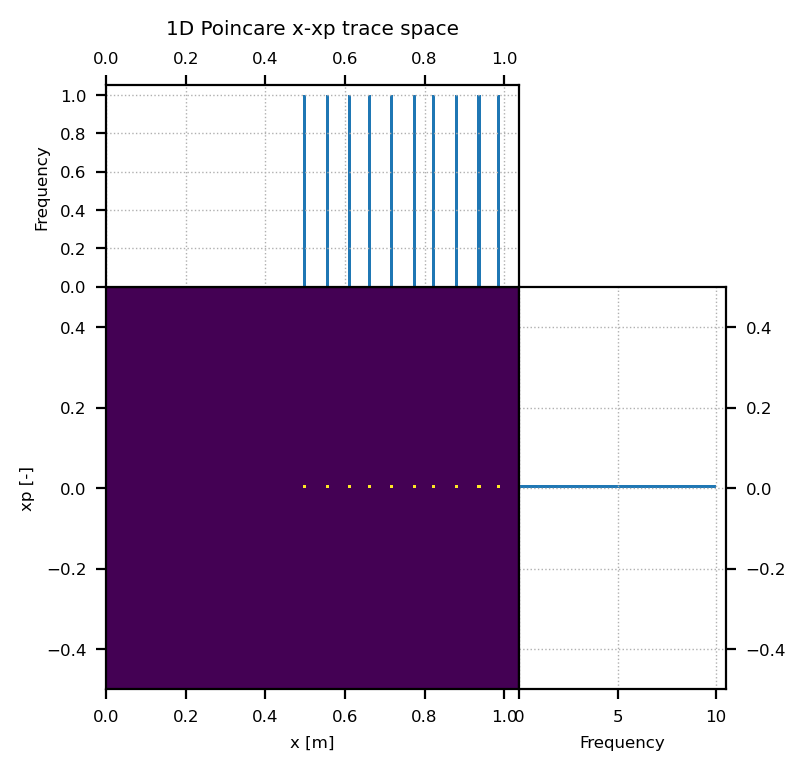

In [14]:
Poincare_1D_offset_bunch.plot_heatmap('x', 'xp', 'Plots/1D_Poincare_horizontal_offset.png','1D Poincare x-xp trace space')

## 2D Poincare

In [15]:
beta_x = 3.183218456327231
beta_y = 17.366440445018583
alpha_x =  -0.002213666757314968
alpha_y =  -0.0010751726719423877
D_x =  0.0003478381975430389
D_xp = -0.0010490010818251987
D_y = 0.
D_yp = 0.
emittance_x = emittance_y = 750 * 1E-6 * np.pi
min_sig = 0
max_sig = 10
n = 10
Poincare_2D_bunch = ParticleBunch.Poincare_2D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, min_sig, max_sig)      

MatchedBunchGenerator1D::Poincare_1D: Dispersion Not Set - Assuming to be ZERO


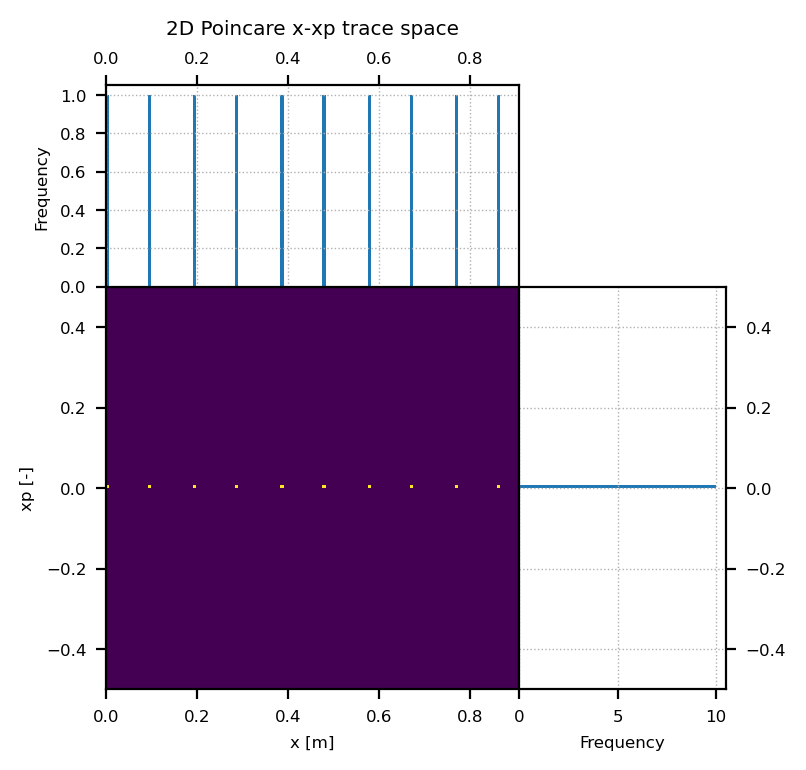

In [16]:
Poincare_2D_bunch.plot_heatmap('x', 'xp', 'Plots/2D_Poincare_x_xp.png','2D Poincare x-xp trace space')

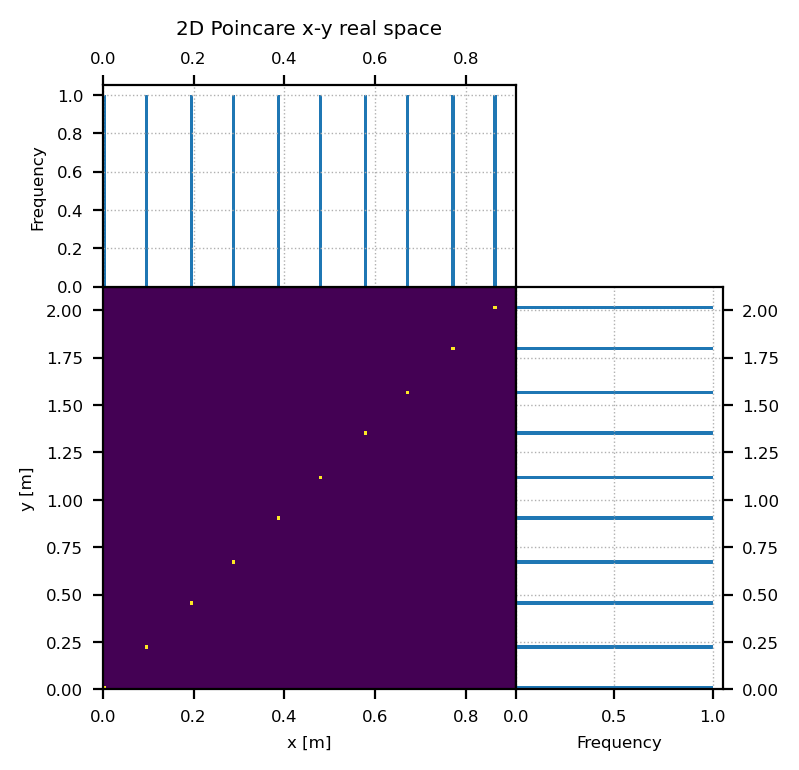

In [17]:
Poincare_2D_bunch.plot_heatmap('x', 'y', 'Plots/2D_Poincare_x_y.png','2D Poincare x-y real space')

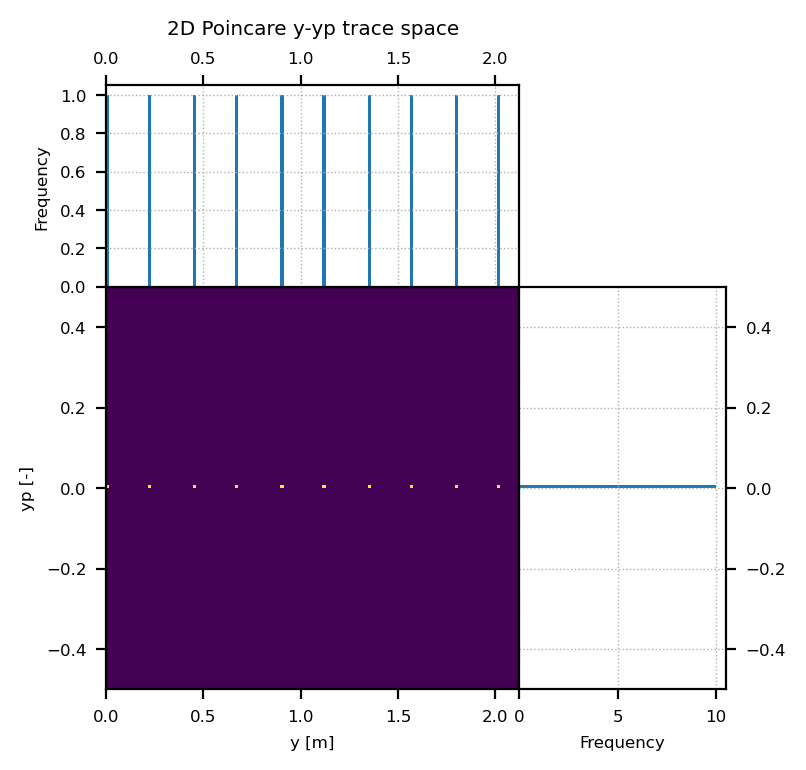

In [18]:
Poincare_2D_bunch.plot_heatmap('y', 'yp', 'Plots/2D_Poincare_y_yp.png','2D Poincare y-yp trace space')

## Gaussian 1D

In [19]:
n = 1E4
std_dev = 1
mean = 0
coordinate = 'x'
Gaussian_1D_bunch = ParticleBunch.Gaussian_1D(n, std_dev, mean, coordinate)

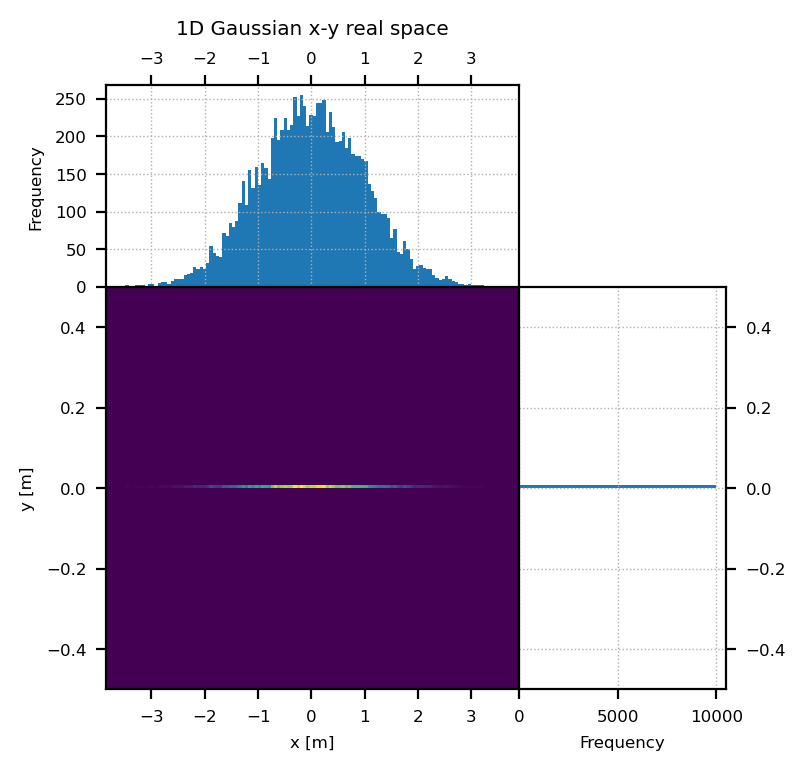

In [20]:
Gaussian_1D_bunch.plot_heatmap('x', 'y', 'Plots/1D_Gaussian.png','1D Gaussian x-y real space')

## Gaussian 2D

In [21]:
n = 1E5
std_dev1 = 1
mean1 = 0
coordinate1 = 'x'
std_dev2 = 2
mean2 = 5
coordinate2 = 'y'
Gaussian_2D_bunch = ParticleBunch.Gaussian_2D(n, mean1, std_dev1, mean2, std_dev2, coordinate1, coordinate2)

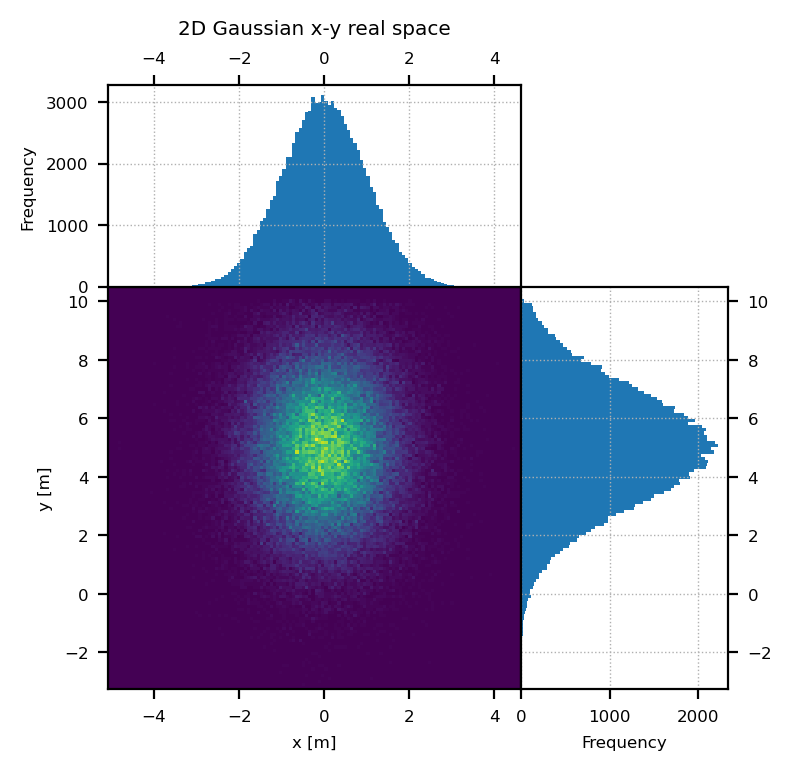

In [22]:
Gaussian_2D_bunch.plot_heatmap('x', 'y', 'Plots/2D_Gaussian.png','2D Gaussian x-y real space')

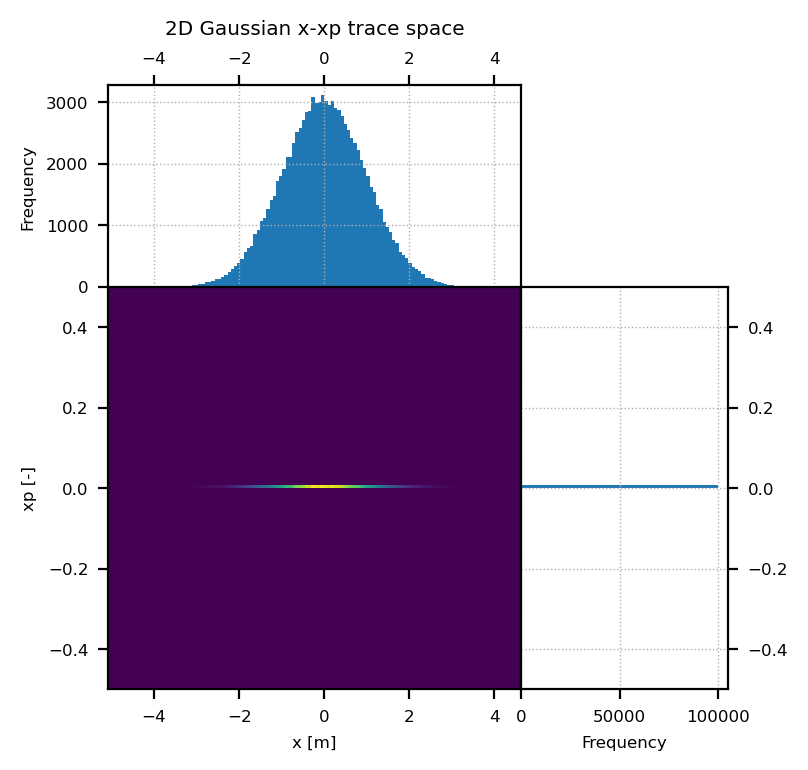

In [23]:
Gaussian_2D_bunch.plot_heatmap('x', 'xp', 'Plots/2D_Gaussian_x_xp.png','2D Gaussian x-xp trace space')

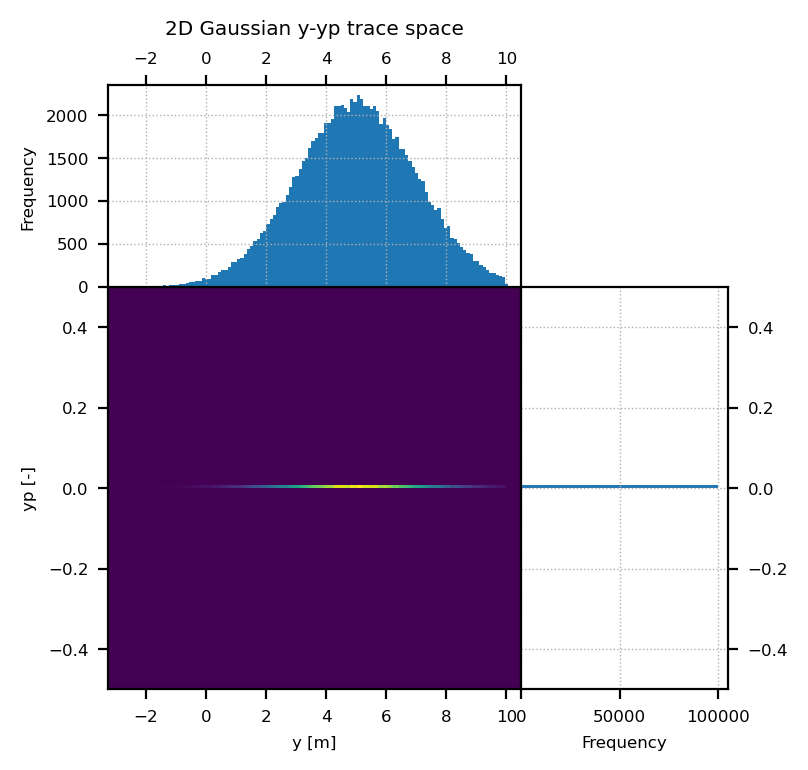

In [24]:
Gaussian_2D_bunch.plot_heatmap('y', 'yp', 'Plots/2D_Gaussian_y_yp.png','2D Gaussian y-yp trace space')

## Gaussian 4D

In [25]:
n = 1E5
std_dev_x = 1
mean_x = 0
std_dev_y = 2
mean_y = 5
std_dev_xp = 0.1
mean_xp = 0
std_dev_yp = 0.2
mean_yp = 0

Gaussian_4D_bunch = ParticleBunch.Gaussian_4D(n, mean_x, std_dev_x, mean_xp, std_dev_xp, mean_y, std_dev_y, mean_yp, std_dev_yp)

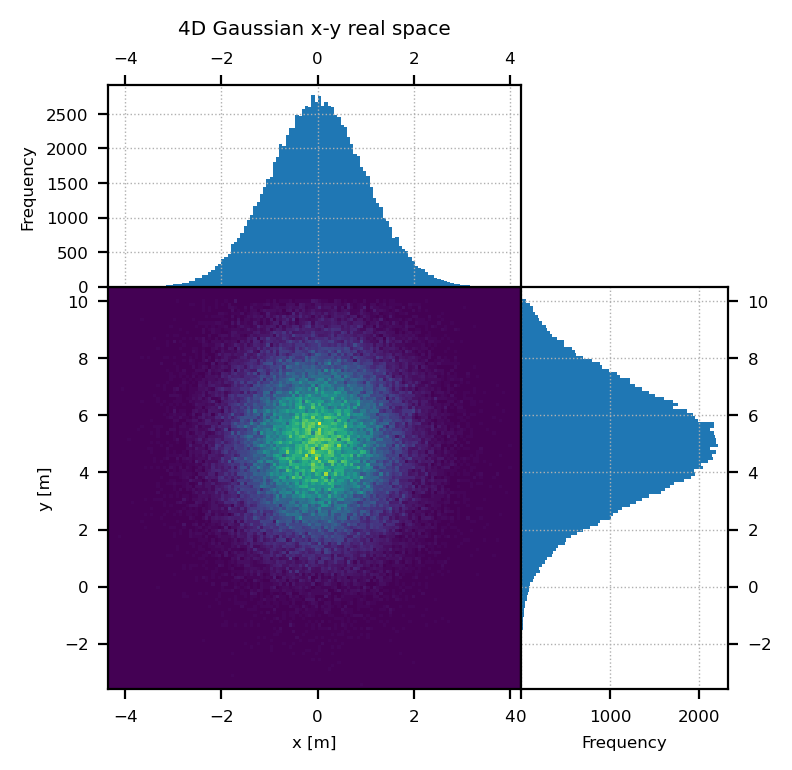

In [26]:
Gaussian_4D_bunch.plot_heatmap('x', 'y', 'Plots/4D_Gaussian.png','4D Gaussian x-y real space')

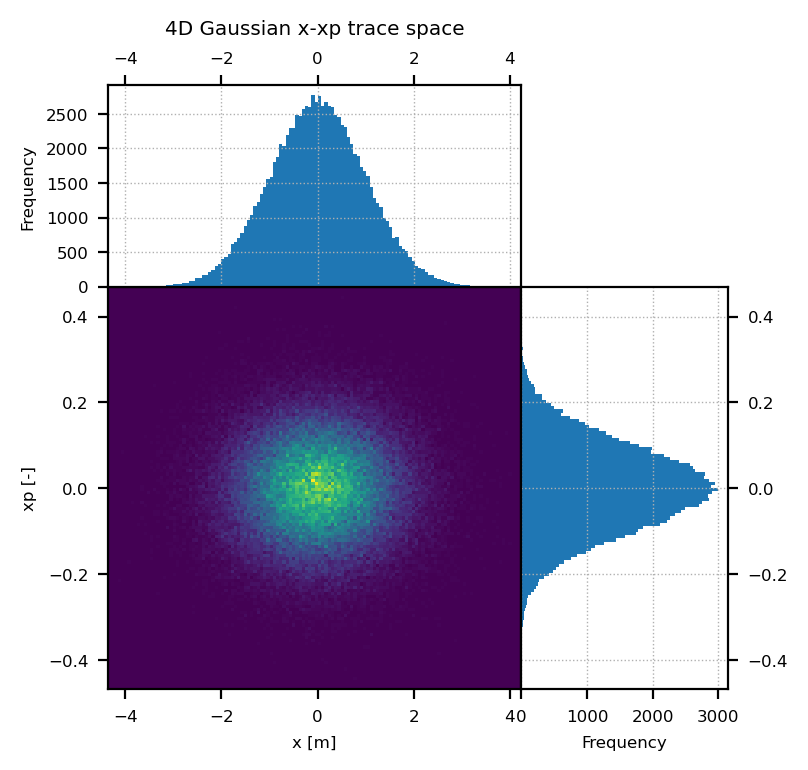

In [27]:
Gaussian_4D_bunch.plot_heatmap('x', 'xp', 'Plots/4D_Gaussian_x_xp.png','4D Gaussian x-xp trace space')

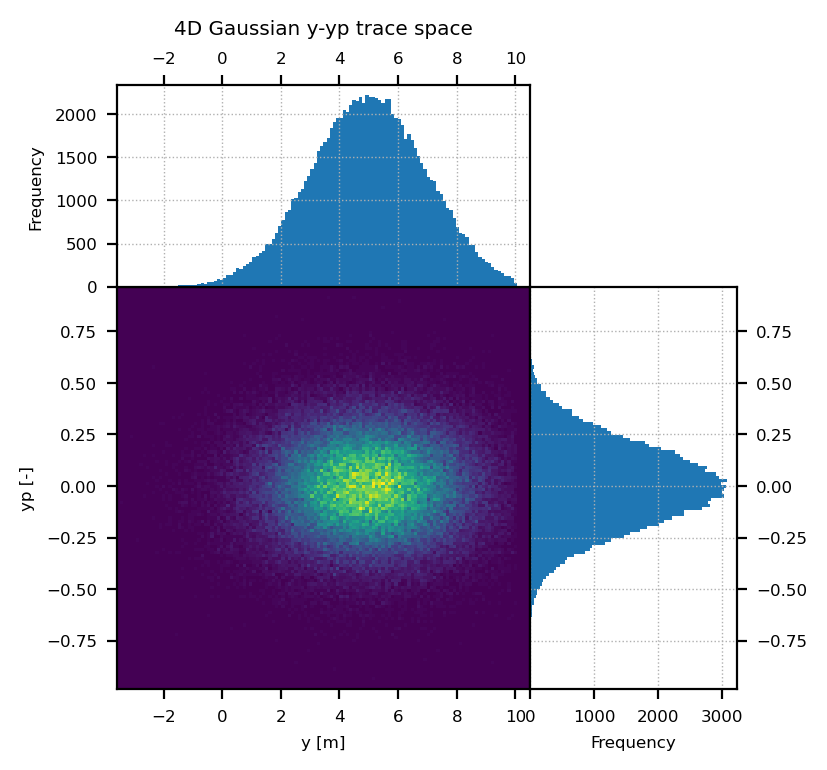

In [28]:
Gaussian_4D_bunch.plot_heatmap('y', 'yp', 'Plots/4D_Gaussian_y_yp.png','4D Gaussian y-yp trace space')

## Matched Gaussian 4D

In [29]:
beta_x = 3.215250830692
beta_y = 18.598794417925
alpha_x =  -0.547366008626
alpha_y =  2.750780302852
D_x =  -0.000103040524
D_xp = 0.001254020379
D_y = 0.
D_yp = 0.
emittance_x = emittance_y = 400 * 1E-6
x_limit = 5
y_limit = 5
n = 1E6

In [30]:
Matched_Gaussian_4D_bunch = ParticleBunch.MatchedGaussian_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y, x_limit = 5, y_limit = 5)

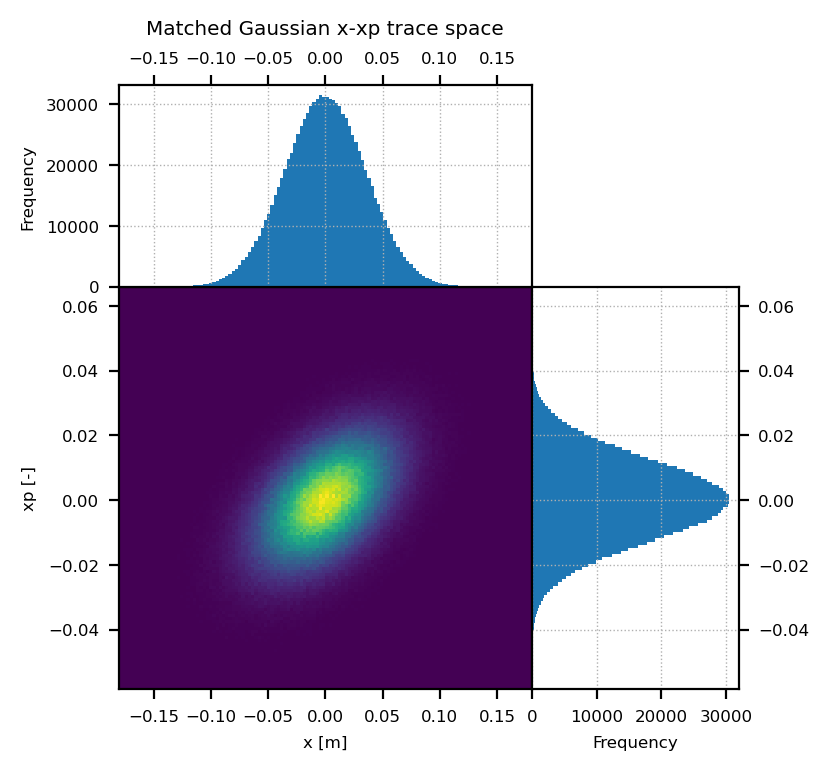

In [31]:
Matched_Gaussian_4D_bunch.plot_heatmap('x', 'xp', 'Plots/Matched_Gaussian_4D_x_xp.png', 'Matched Gaussian x-xp trace space')

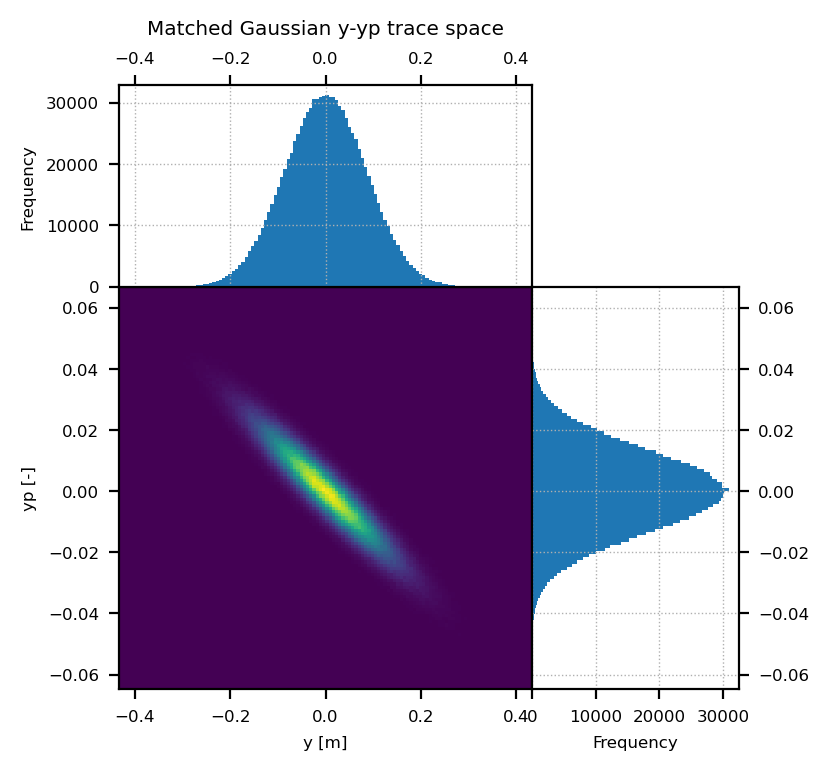

In [32]:
Matched_Gaussian_4D_bunch.plot_heatmap('y', 'yp', 'Plots/Matched_Gaussian_4D_y_yp.png', 'Matched Gaussian y-yp trace space')

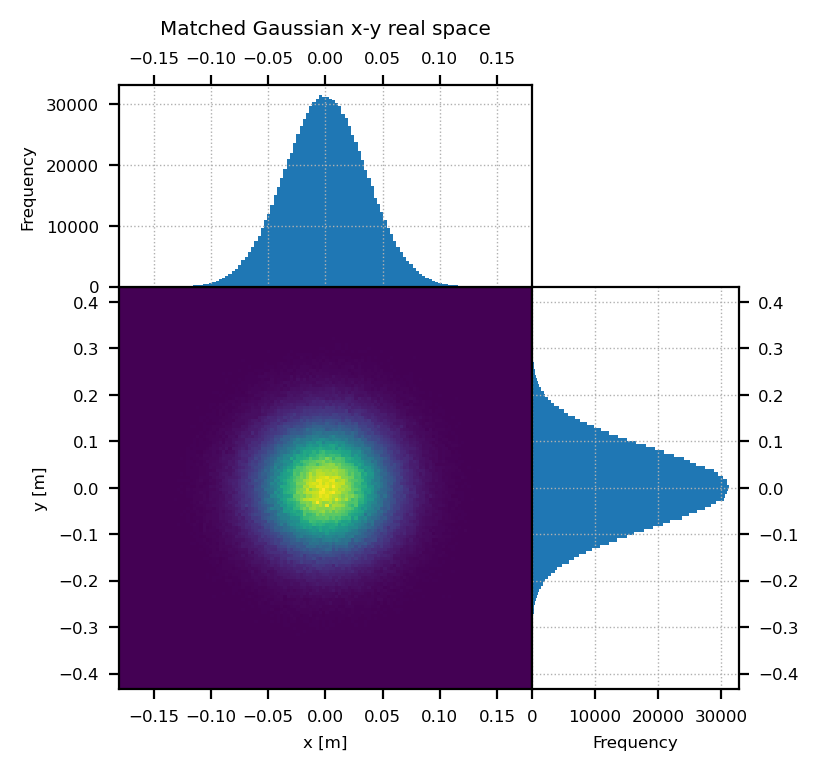

In [33]:
Matched_Gaussian_4D_bunch.plot_heatmap('x', 'y', 'Plots/Matched_Gaussian_4D.png', 'Matched Gaussian x-y real space')

## Matched Waterbag 4D 

In [34]:
Matched_Waterbag_4D_bunch = ParticleBunch.MatchedWaterbag_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y)

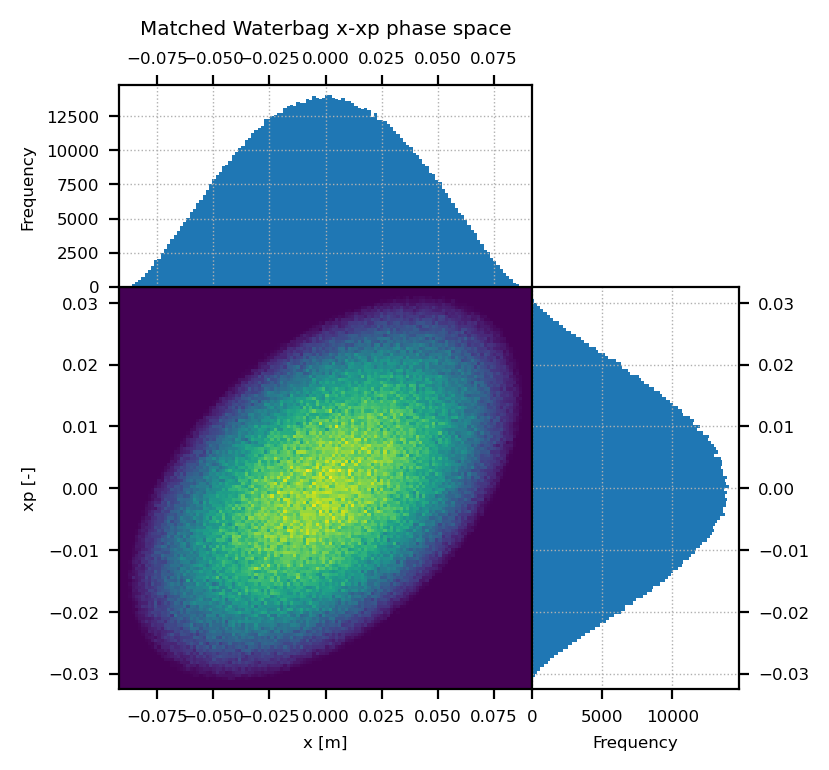

In [35]:
Matched_Waterbag_4D_bunch.plot_heatmap('x', 'xp', 'Plots/Matched_Waterbag_x_xp.png', 'Matched Waterbag x-xp phase space')

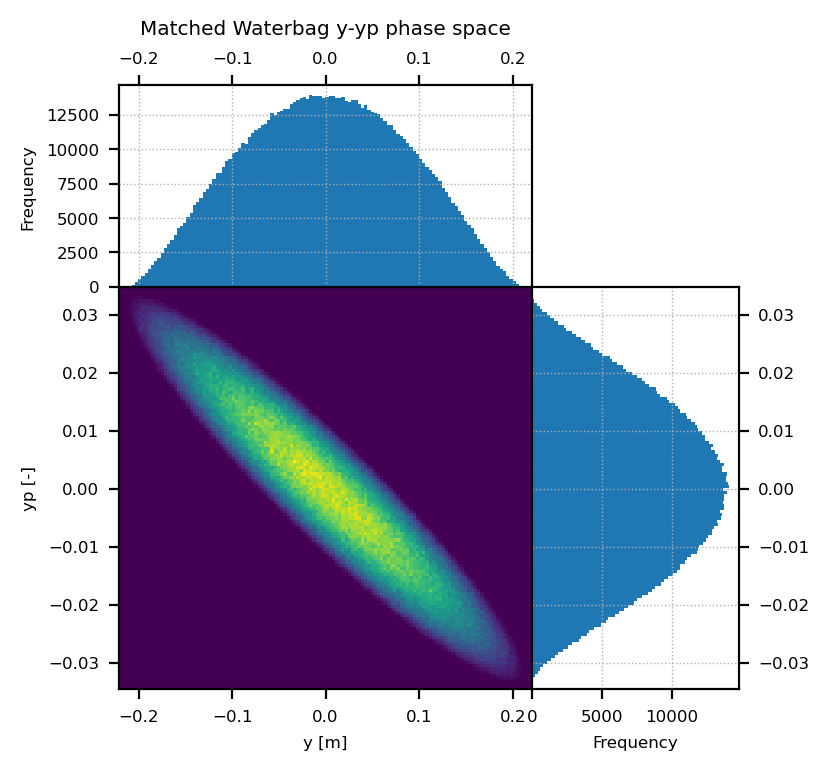

In [36]:
Matched_Waterbag_4D_bunch.plot_heatmap('y', 'yp', 'Plots/Matched_Waterbag_y_yp.png', 'Matched Waterbag y-yp phase space')

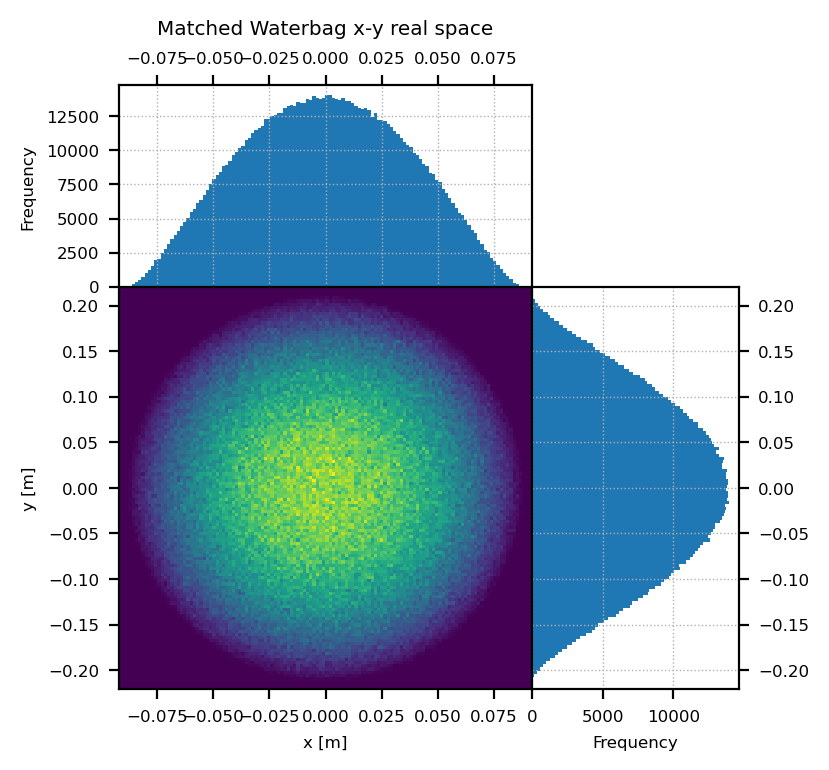

In [37]:
Matched_Waterbag_4D_bunch.plot_heatmap('x', 'y', 'Plots/Matched_Waterbag_x_y.png', 'Matched Waterbag x-y real space')

## Matched KV 4D 

In [38]:
Matched_KV_4D_bunch = ParticleBunch.MatchedKV_4D(n, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y)

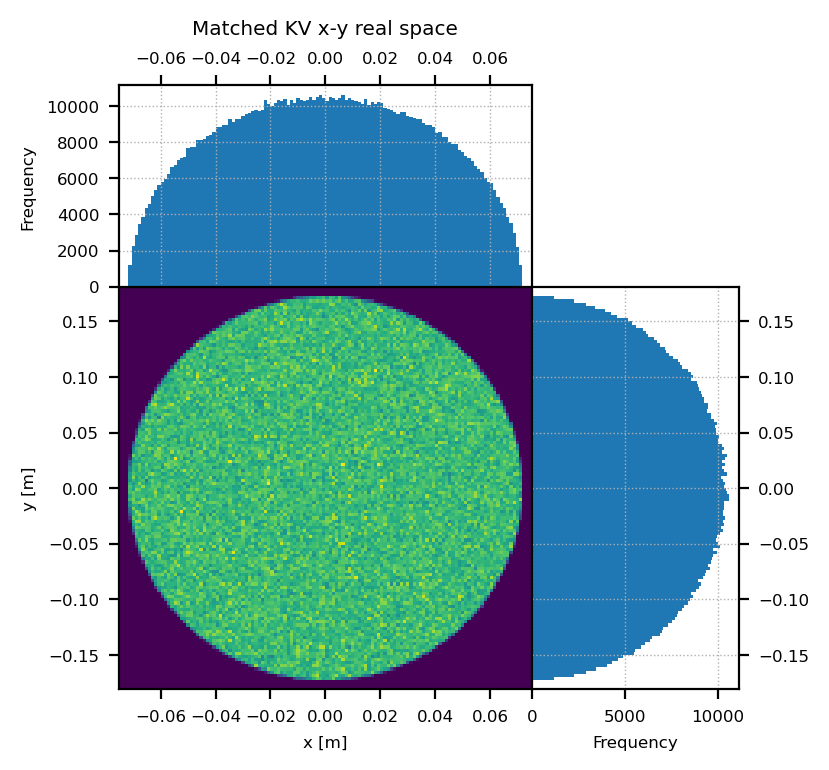

In [39]:
Matched_KV_4D_bunch.plot_heatmap('x', 'y', 'Plots/Matched_KV.png', 'Matched KV x-y real space')

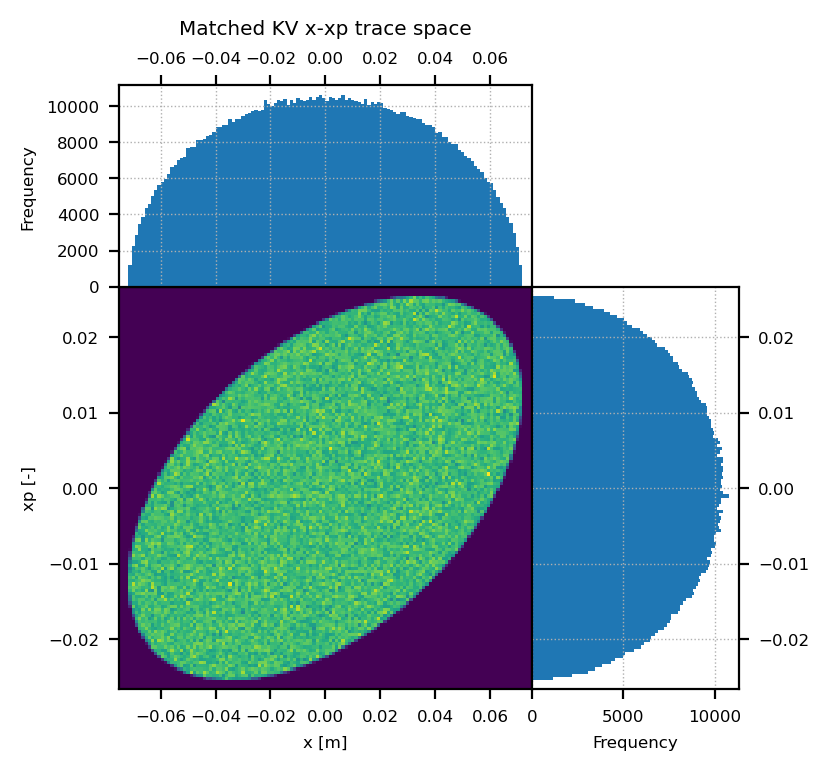

In [40]:
Matched_KV_4D_bunch.plot_heatmap('x', 'xp', 'Plots/Matched_KV_x_xp.png', 'Matched KV x-xp trace space')

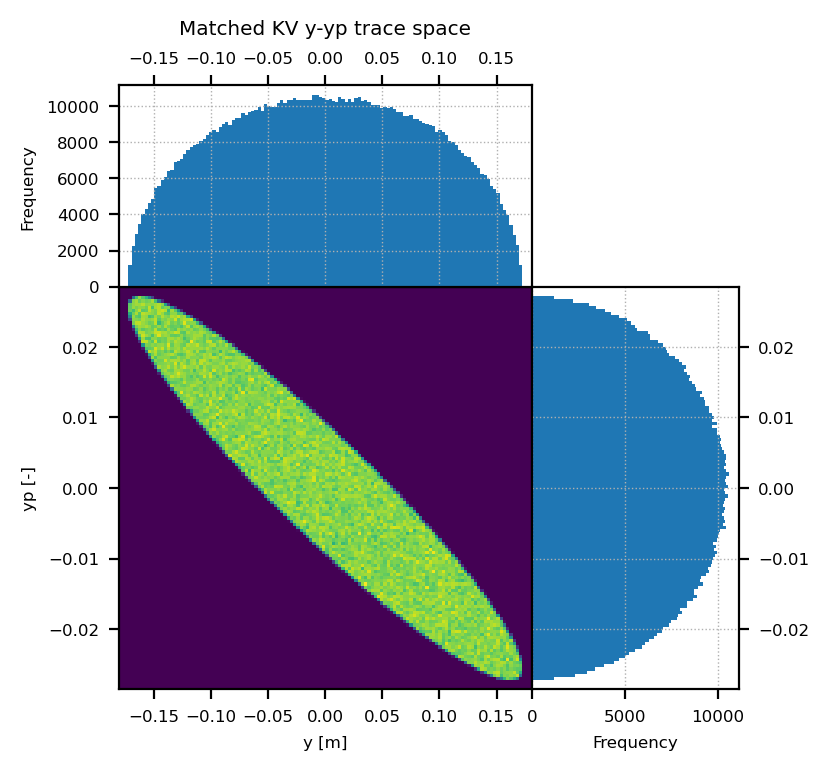

In [41]:
Matched_KV_4D_bunch.plot_heatmap('y', 'yp', 'Plots/Matched_Waterbag_y_yp', 'Matched KV y-yp trace space')

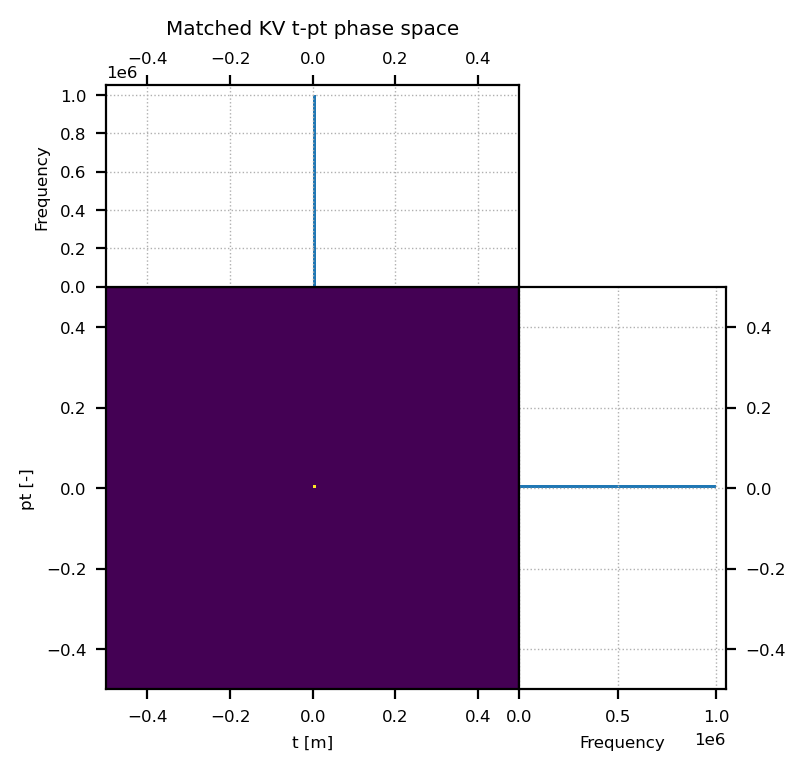

In [42]:
Matched_KV_4D_bunch.plot_heatmap('t', 'pt', 'Plots/Matched_Waterbag_t_pt.png', 'Matched KV t-pt phase space')

# Save bunch to file 

> `ParticleBunch` currently has several options for saving bunch co-ordinates to file:
>
>
> - **`ParticleBunch.print_MADX_file(filename)`**: saves 6D co-ordinates to MAD-X / cPyMAD readable text file (include file extention in name - e.g. Gaussian_4D.madx).
>
>
> - **`ParticleBunch.print_PTC_file(filename)`**: saves 6D co-ordinates to PTC readable text file (include file extention in name - e.g. Gaussian_4D.ptc).
>
>
> - **`ParticleBunch.print_file(filename)`**: saves 6D co-ordinates to tab separated text file (include file extention in name - e.g. Gaussian_4D.dat). This format is used to generate a `ParticleBunch` object from file.

#### Access Bash to make a new directory for ParticleBunch output files

In [43]:
! mkdir Output_Files

mkdir: cannot create directory ‘Output_Files’: File exists


- Save Matched 4D KV bunch to MAD-X readable file

In [44]:
Matched_KV_4D_bunch.print_MADX_file('Output_Files/Matched_KV_4D.madx')

- Use the Bash `Head` program to see the first few lines 

In [45]:
!head Output_Files/Matched_KV_4D.madx

start, x=-0.05930817892354478, px=-0.009748552884300042, y=0.034258830286155326, py=-0.009944679985446672, t=0.0, pt=0.0;
start, x=0.014005851261022715, px=-0.01255952673145233, y=-0.06261403608943136, py=0.0035329607439107645, t=0.0, pt=0.0;
start, x=0.047566724640878244, px=-0.008391584560915996, y=0.016825954802393794, py=-0.0018818346745586318, t=0.0, pt=0.0;
start, x=0.03825319781051382, px=0.022672291792995753, y=0.04213010279920383, py=-0.002872479027899828, t=0.0, pt=0.0;
start, x=0.0014534900213395644, px=0.015389904007434877, y=-0.07796318202239737, py=0.006166021639286499, t=0.0, pt=0.0;
start, x=-0.03705928009966987, px=-0.011492837639336806, y=-0.1332940590658188, py=0.017058783719870078, t=0.0, pt=0.0;
start, x=0.03539465027816041, px=0.023809419160235434, y=-0.028268364705524518, py=0.0070258267561839755, t=0.0, pt=0.0;
start, x=0.03991057677388291, px=0.006193842586754558, y=-0.11193518411425414, py=0.011748350289991537, t=0.0, pt=0.0;
start, x=0.013904242967959949, px=

- Save Matched 4D Waterbag to PTC readable file

In [46]:
Matched_Waterbag_4D_bunch.print_PTC_file('Output_Files/Matched_Waterbag_4D.ptc')

- Use the Bash `Head` program to see the first few lines 

In [47]:
!head Output_Files/Matched_Waterbag_4D.ptc

ptc_start, x=0.059675366921248196, px=0.0062400992748519344, y=0.09040318289006795, py=-0.01002600453750478, t=0.0, pt=0.0;
ptc_start, x=0.04556551597386852, px=0.006311170361309097, y=0.15379666794329158, py=-0.025392471984777898, t=0.0, pt=0.0;
ptc_start, x=-0.004491270209439715, px=0.00026867359809941557, y=-0.11275064625711792, py=0.024523008902764057, t=0.0, pt=0.0;
ptc_start, x=-8.4707668903908e-05, px=0.017747081037753795, y=-0.02670269505242686, py=-0.00383442520061258, t=0.0, pt=0.0;
ptc_start, x=0.0535520677850916, px=0.01682649353850213, y=0.0798835994281863, py=-0.008137281414932224, t=0.0, pt=0.0;
ptc_start, x=-0.04397207251455083, px=0.001012752541219758, y=0.009157832244675387, py=-0.0021452325328410815, t=0.0, pt=0.0;
ptc_start, x=-0.02018063561914654, px=-0.002132664160869424, y=-0.09955224449789593, py=0.024102824241607024, t=0.0, pt=0.0;
ptc_start, x=0.02681681536294265, px=0.013574217854706697, y=0.048984092819622994, py=-0.007652300537194773, t=0.0, pt=0.0;
ptc_sta

In [48]:
Matched_Gaussian_4D_bunch.print_file('Output_Files/Matched_Gaussian_4D.dat')

- Use the Bash `Head` program to see the first few lines 

In [49]:
!head Output_Files/Matched_Gaussian_4D.dat

-0.0006147232299338016	0.0016091487723732868	-0.03504685322375249	0.007627316473362769	0.0	0.0
-0.002110342156658498	-0.002575067692563974	0.17130531399260715	-0.025456990398979317	0.0	0.0
0.04610916665718947	-0.0028598011812392293	0.0929271580344661	-0.01232606252103007	0.0	0.0
-0.004528189892267011	-0.0005975847191267992	-0.09163433645092108	0.015032556342633355	0.0	0.0
0.057385839068866004	0.006130841525737322	-0.1273917016115471	0.022442897761874483	0.0	0.0
0.02182178795375295	0.027982372983826182	-0.026634601256613277	0.004819564875490802	0.0	0.0
-0.02653715000056476	-0.011750533287317887	0.10513895138969202	-0.023329086999574523	0.0	0.0
-0.08951845338547498	-0.012632277705202827	0.15339867059071868	-0.025240863886879975	0.0	0.0
-0.009922115024004682	-0.0015460668733467075	0.01773889439711615	-0.0056259299306376034	0.0	0.0
-0.04682389357016309	-0.03058836878062871	0.005043065251412967	0.011835875093182633	0.0	0.0


## Generate new `ParticleBunch` object from stored file: `Output_Files/Matched_Gaussian_4D.dat` 

- Use Bash list program to see what is inside the Output_Files directory

In [50]:
!ls Output_Files

Matched_Gaussian_4D.dat  Matched_KV_4D.madx  Matched_Waterbag_4D.ptc


In [51]:
new_bunch_from_file = ParticleBunch.from_file('Output_Files/Matched_Gaussian_4D.dat')

Loaded 0 particles
Loaded 10000 particles
Loaded 20000 particles
Loaded 30000 particles
Loaded 40000 particles
Loaded 50000 particles
Loaded 60000 particles
Loaded 70000 particles
Loaded 80000 particles
Loaded 90000 particles
Loaded 100000 particles
Loaded 110000 particles
Loaded 120000 particles
Loaded 130000 particles
Loaded 140000 particles
Loaded 150000 particles
Loaded 160000 particles
Loaded 170000 particles
Loaded 180000 particles
Loaded 190000 particles
Loaded 200000 particles
Loaded 210000 particles
Loaded 220000 particles
Loaded 230000 particles
Loaded 240000 particles
Loaded 250000 particles
Loaded 260000 particles
Loaded 270000 particles
Loaded 280000 particles
Loaded 290000 particles
Loaded 300000 particles
Loaded 310000 particles
Loaded 320000 particles
Loaded 330000 particles
Loaded 340000 particles
Loaded 350000 particles
Loaded 360000 particles
Loaded 370000 particles
Loaded 380000 particles
Loaded 390000 particles
Loaded 400000 particles
Loaded 410000 particles
Loaded

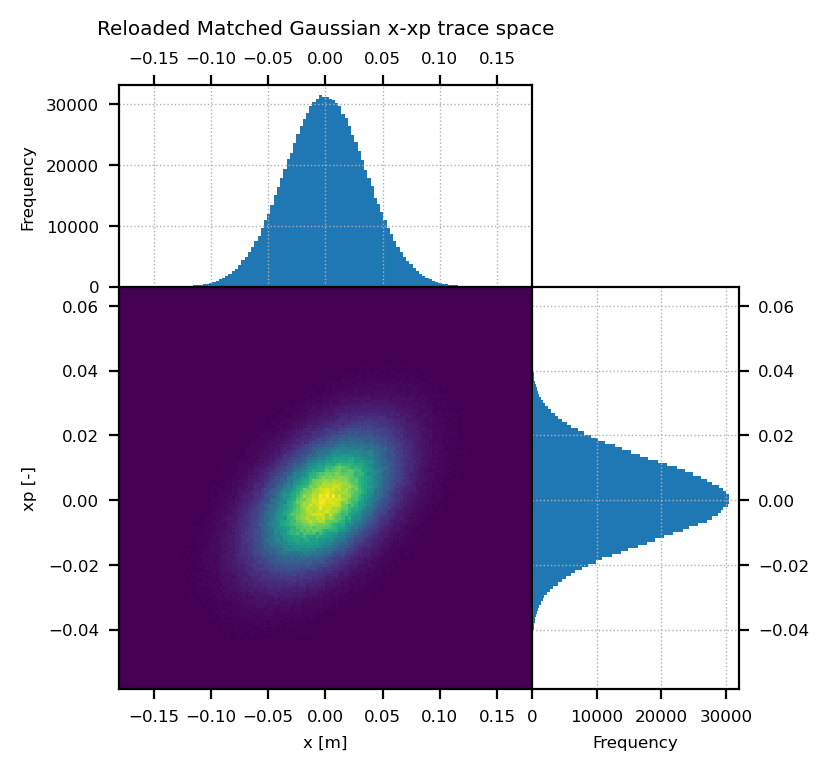

In [52]:
new_bunch_from_file.plot_heatmap('x', 'xp', 'Plots/Reloaded_Matched_Gaussian_4D_x_xp.png', 'Reloaded Matched Gaussian x-xp trace space')

- compare to stored Matched Gaussian 4D plot

![Generated Matched 4D Gaussian](Plots/Matched_Gaussian_4D_x_xp.png)

## Now you should know:
- How to use PyParticleBunch to generate particle bunch distributions of various types
- How to plot heatmaps of the distributions by selecting 2 co-ordinates, and how to save the plot to file
- How to save `ParticleBunch` co-ordinates to MAD-X, PTC, and data files
- How to generate a `ParticleBunch` from a stored data file